<a href="https://colab.research.google.com/github/fatemehes75/Classification_problems/blob/main/Tumor_classification_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

SVM maps data to a high-dimensional feature space when they can not be separated in lower dimension and data are not linearly separable. So in higher dimension data can be categorized.





In [1]:
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

The dataset consists of several hundred human cell sample records and each has characteristics. The samples are benign (value = 2) or malignant (value = 4).



In [2]:
df = pd.read_csv("cell_samples.csv")
df.head(10)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [4]:
from sklearn import preprocessing
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()] #f ‘coerce’, then invalid parsing will be set as NaN
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

<ipython-input-4-f3a19490bc59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BareNuc'] = df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [5]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
print(x[0:5])
print(y[0:30])

[[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]
 [ 3  1  1  1  2  2  3  1  1]
 [ 6  8  8  1  3  4  3  7  1]
 [ 4  1  1  3  2  1  3  1  1]]
[2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 2 4 2 2 2 2 2]


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
from sklearn import svm
tumor_svm = svm.SVC(kernel='rbf').fit(x_train,y_train)
Predicted_y = tumor_svm.predict(x_test)
Predicted_y [0:5]

array([4, 4, 2, 2, 2])

In [8]:
#function for plotting confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicted')
cnf_matrix = confusion_matrix(y_test, Predicted_y, labels=[2,4])

              precision    recall  f1-score   support

           2       0.94      0.97      0.96        79
           4       0.96      0.91      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137

Confusion matrix, without normalization
[[77  2]
 [ 5 53]]


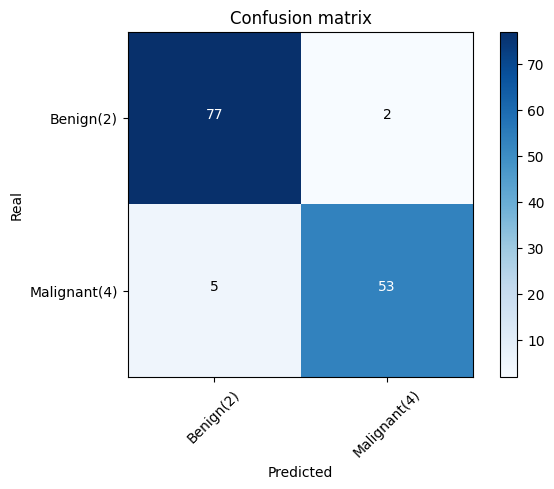

In [9]:
# Compute confusion matrix
np.set_printoptions(precision=2)
print (classification_report(y_test, Predicted_y))

# Plotconfusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes =['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [10]:
from sklearn.metrics import f1_score
f1_score(y_test, Predicted_y, average='weighted') 

0.9487028980826427